<a href="https://colab.research.google.com/github/LucasAb8/IAAA1-DISTANCIA_Oficial/blob/main/TP3_AA1_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Escriba aquí su nombre completo**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/dataset/59/letter+recognition
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  




#Introducción

# El dataset elegido es "Letter Recognition"
# Link:
https://archive.ics.uci.edu/dataset/59/letter+recognition
# Autor:
David Slate
# Descripción:
El objetivo es identificar cada una de una gran cantidad de pantallas rectangulares de píxeles en blanco y negro como una de las 26 letras mayúsculas del alfabeto inglés. Las imágenes de los caracteres se basaron en 20 fuentes tipográficas diferentes, y cada letra dentro de estas 20 fuentes fue distorsionada aleatoriamente para producir un archivo con 20,000 estímulos únicos. Cada estímulo fue convertido en 16 atributos numéricos primitivos (momentos estadísticos y conteos de bordes), que luego fueron escalados para ajustarse a un rango de valores enteros del 0 al 15. Normalmente se entrena el modelo con los primeros 16,000 elementos y luego se utiliza el modelo resultante para predecir la categoría de letra de los 4,000 restantes. Consulta el artículo citado anteriormente para más detalles.


#  Variables:
	 1.	lettr	Letra Mayúscula	(26, desde la A to Z  para el abcedario de habla inglesa - Categórico)
	 2.	x-box	posición horizontal de la caja (entero - cuantitativa discreta)
	 3.	y-box	posición vertical de la caja (entero - cuantitativa discreta)
	 4.	width	ancho de la caja	(entero - cuantitativa discreta)
	 5.	high 	alto de la caja	(entero - cuantitativa discreta)
	 6.	onpix	número total de píxeles encendidos (entero - cuantitativa discreta)
	 7.	x-bar	valor medio de x de los píxeles encendidos en la caja	(entero - cuantitativa discreta)
	 8.	y-bar	valor medio de y de los píxeles encendidos en la caja	(entero - cuantitativa discreta)
	 9.	x2bar	varianza media de x		(entero - cuantitativa discreta)
	10.	y2bar	varianza media de y		(entero - cuantitativa discreta)
	11.	xybar	correlación media entre x e y		(entero - cuantitativa discreta)
	12.	x2ybr	media de x * x * y		(entero - cuantitativa discreta)
	13.	xy2br	media de x * y * y		(entero - cuantitativa discreta)
	14.	x-ege	promedio del conteo de bordes de izquierda a derecha	(entero - cuantitativa discreta)
	15.	xegvy	correlación de x-ege con y	(entero - cuantitativa discreta)
	16.	y-ege	promedio del conteo de bordes de abajo hacia arriba	(entero - cuantitativa discreta)
	17.	yegvx	correlación de y-ege con x	(entero - cuantitativa discreta)

Tiene 16 features y un target(lettr)

#Fuente
https://archive.ics.uci.edu/dataset/59/letter+recognition


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC, SVC

In [28]:
#Link del datset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"

#Se renombran las variables
columnas = [
    "letter", "x_box", "y_box", "width", "height", "onpix", "x_bar", "y_bar",
    "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x_ege", "xegvy", "y_ege", "yegvx"
]
#Carga del dataset
df_letrec = pd.read_csv(url, encoding="ISO-8859-1", names=columnas)

#Vista del dataset
df_letrec.head()

,letter,x_box,y_box,width,height,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


#Desrcipción del dataset


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

#Descripción de las variables

In [29]:
#INformación del datset
df_letrec.info()
#Descripción estadística del dataset
df_letrec.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   x_box   20000 non-null  int64 
 2   y_box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x_bar   20000 non-null  int64 
 7   y_bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x_ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y_ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


,x_box,y_box,width,height,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


#Reducción del dataset
Debido a que el dataset esta orientado para un modelo de clasificación multiclase(todas las letras), y esto conlleva cierta complejidad que escapa por ahora del cursado, el dataset se adapta para un modelo de clasificación binaria, que solo conserva las clases de la letra O y la letra C, que son interesantes de analizar porque comparten simulitudes estructurales, como el tamaño, curvatura, etc.


In [31]:
#Copia del dataset  original pero que conserva los registros con letras O y C
df_oc = df_letrec[df_letrec["letter"].isin(["O", "C"])].copy()
df_oc.head()

,letter,x_box,y_box,width,height,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
11,O,6,13,4,7,4,6,7,6,3,10,7,9,5,9,5,8
16,O,3,4,4,3,2,8,7,7,5,7,6,8,2,8,3,8
17,C,7,10,5,5,2,6,8,6,8,11,7,11,2,8,5,9
23,O,6,11,7,8,5,7,6,9,6,7,5,9,4,8,5,5
25,C,6,11,7,8,3,7,8,7,11,4,7,14,1,7,4,8


#Información del nuevo dataset
Podríamos revisar si hay valores nulos, pero esta información nos dice que de 1489 entradas 1489 datos son no nulos para todas las variables. Es decir que no hay valores nulos.

In [32]:
#Información del dataset
df_oc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1489 entries, 11 to 19996
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  1489 non-null   object
 1   x_box   1489 non-null   int64 
 2   y_box   1489 non-null   int64 
 3   width   1489 non-null   int64 
 4   height  1489 non-null   int64 
 5   onpix   1489 non-null   int64 
 6   x_bar   1489 non-null   int64 
 7   y_bar   1489 non-null   int64 
 8   x2bar   1489 non-null   int64 
 9   y2bar   1489 non-null   int64 
 10  xybar   1489 non-null   int64 
 11  x2ybr   1489 non-null   int64 
 12  xy2br   1489 non-null   int64 
 13  x_ege   1489 non-null   int64 
 14  xegvy   1489 non-null   int64 
 15  y_ege   1489 non-null   int64 
 16  yegvx   1489 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 209.4+ KB


In [33]:
#Cantidad de registros que hay para cada letra (O y C)
df_oc['letter'].value_counts()

,count
letter,
O,753
C,736


Revisar la cantidad de registros para cada clase es útil ya que puede decirnos si estan balanceadas o no. En este caso, la diferencia entre ambas cantidades es pequeña (17) por lo que se puede decir que hay balance

#Descripción estadística

In [34]:
#Descripciones estadísticas
df_oc.describe()

,x_box,y_box,width,height,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,4.073203,7.094694,4.792478,5.314976,3.143721,6.400269,7.292814,6.541303,5.971122,8.334453,6.672263,9.957690,2.694426,8.481531,3.852921,8.210208
std,1.759960,3.315373,1.607876,2.170996,1.848649,1.367696,1.009476,1.447493,2.102188,1.839574,1.548513,2.435779,1.790049,0.952410,1.315435,1.200136
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,4.000000,3.000000,1.000000,4.000000,3.000000,4.000000,0.000000,5.000000,2.000000,4.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,4.000000,7.000000,6.000000,8.000000,1.000000,8.000000,3.000000,8.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,7.000000,6.000000,8.000000,6.000000,9.000000,2.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,4.000000,7.000000,8.000000,8.000000,8.000000,9.000000,8.000000,12.000000,3.000000,9.000000,4.000000,9.000000
max,10.000000,15.000000,10.000000,9.000000,12.000000,10.000000,11.000000,10.000000,12.000000,13.000000,11.000000,15.000000,12.000000,13.000000,10.000000,14.000000


#Distribuciones

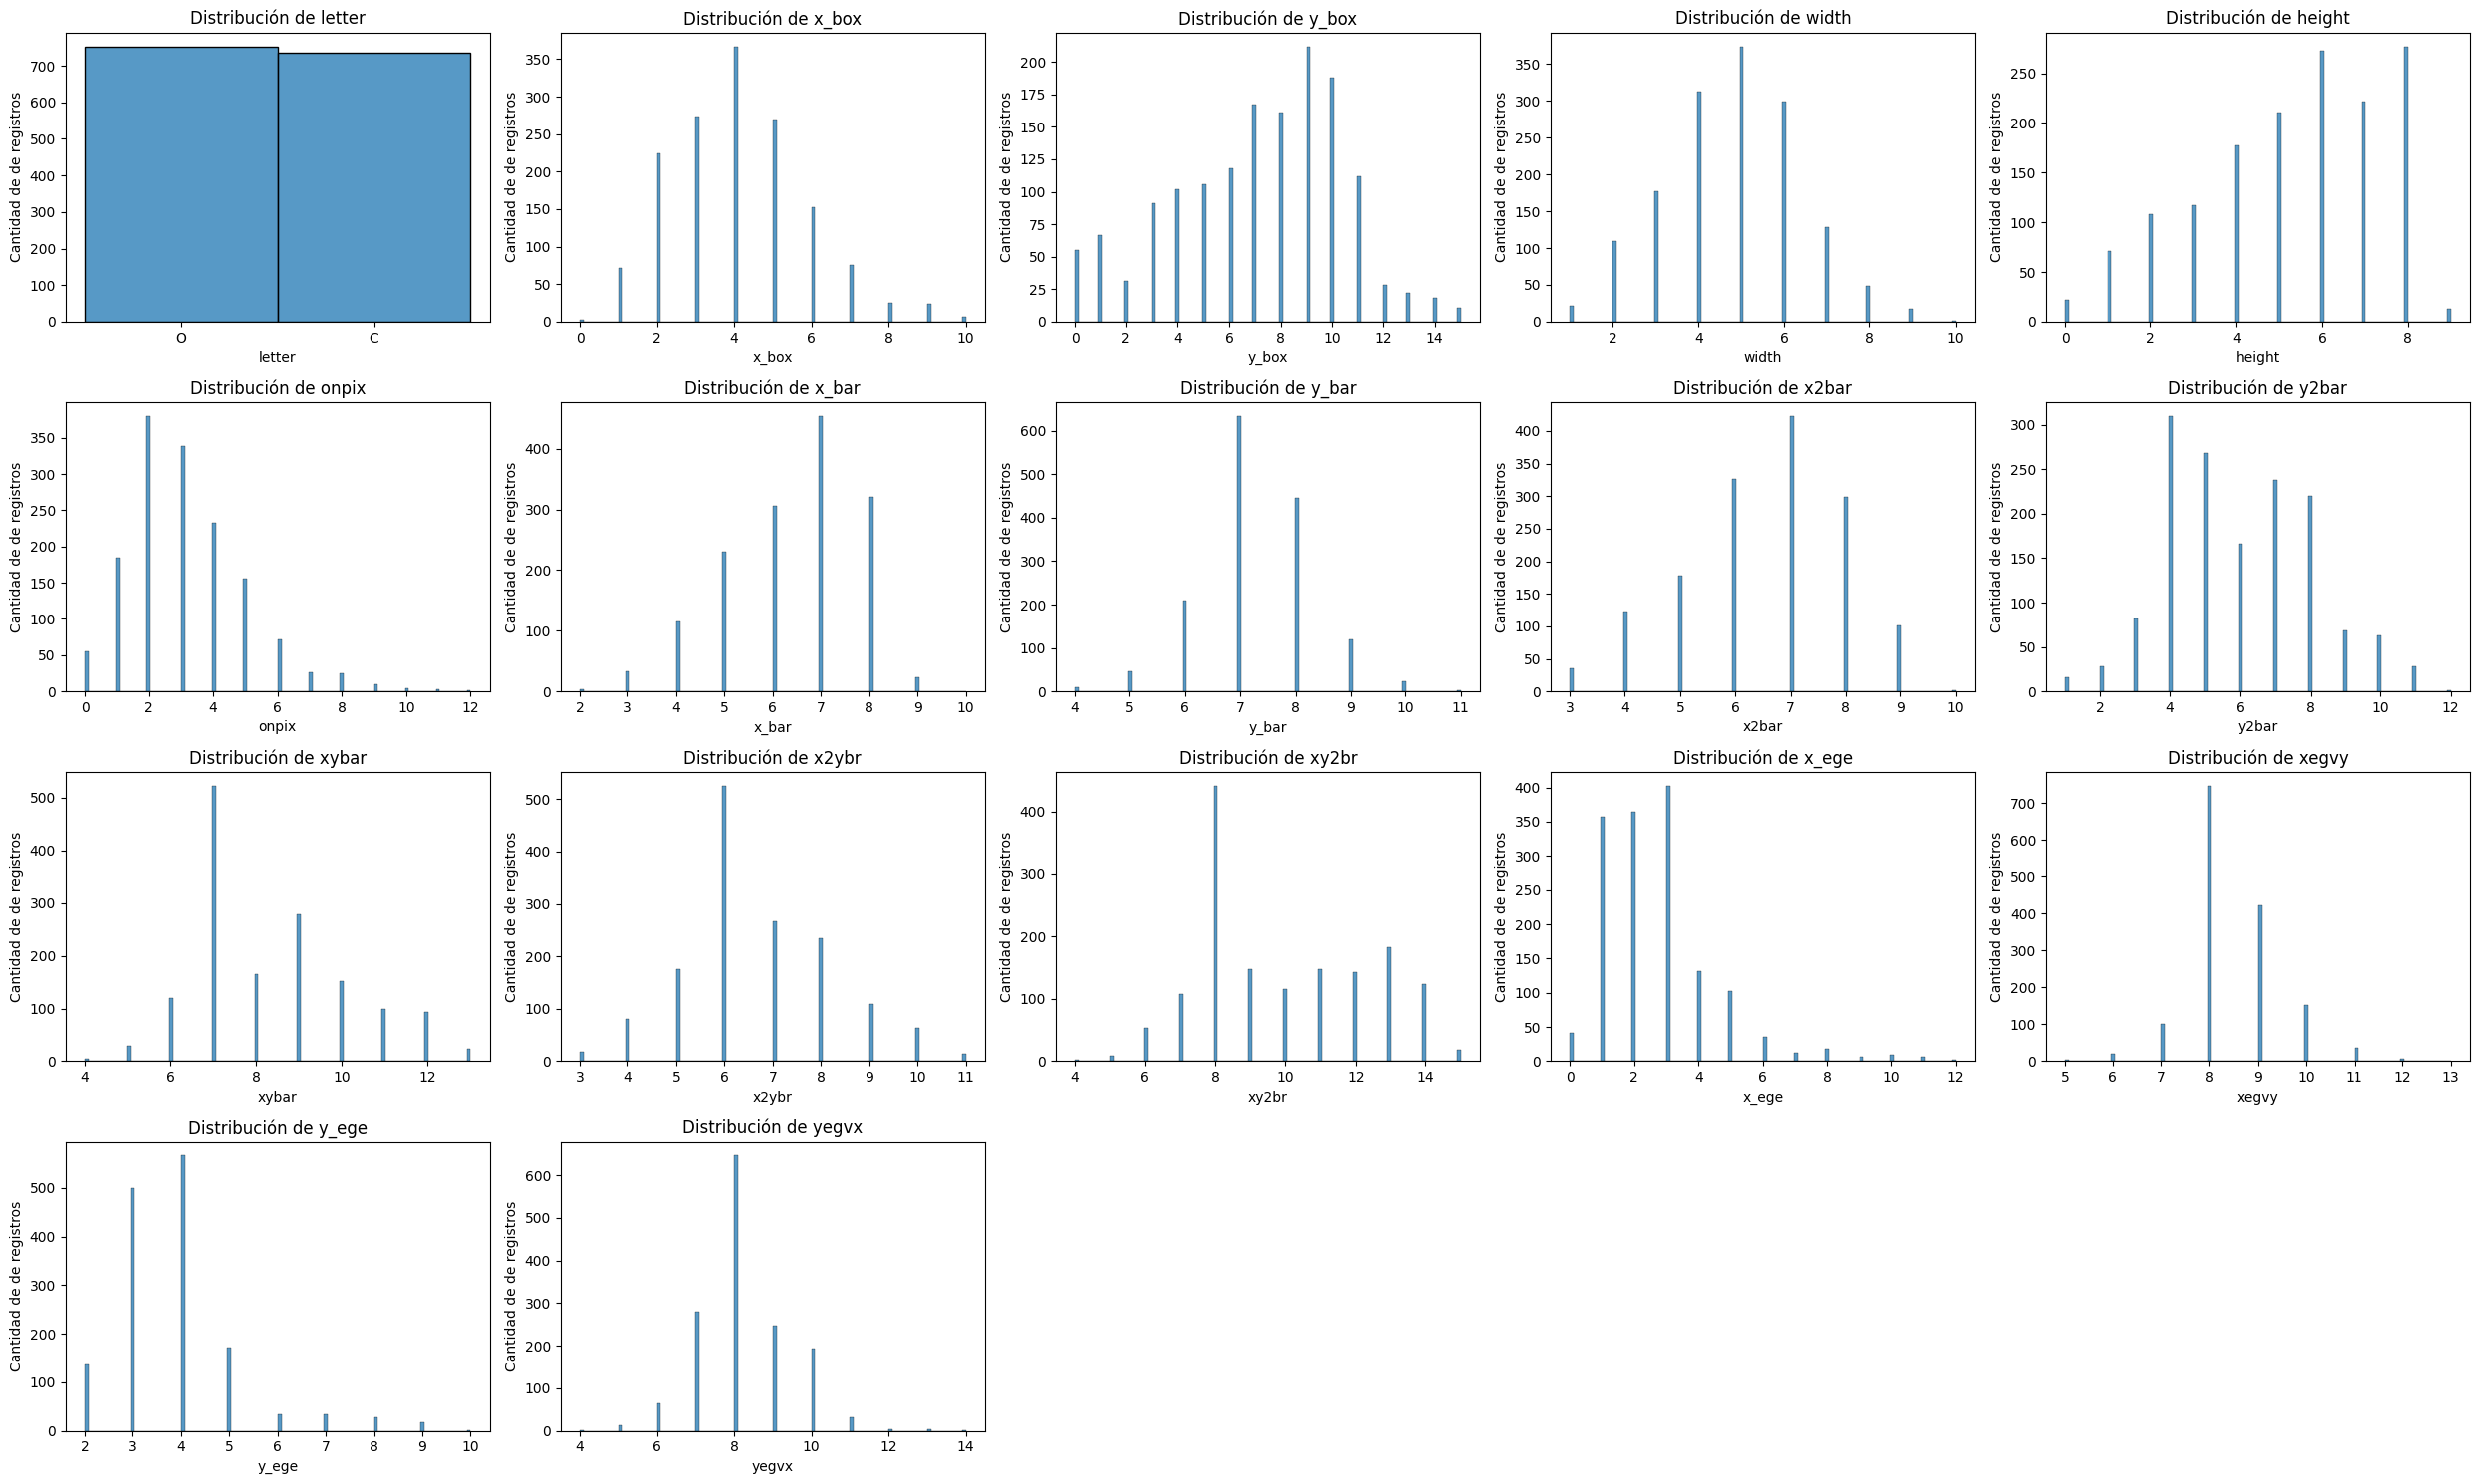

In [35]:
#Gráfico de distribuciones
plt.figure(figsize=(25, 15))
for i in df_oc.columns:
  plt.subplot(4, 5, columnas.index(i)+1)
  sns.histplot(df_oc[i], bins=100, kde=False)
  plt.title(f"Distribución de {i}")
  plt.xlabel(f"{i}")
  plt.ylabel("Cantidad de de registros")

plt.tight_layout()
plt.show()

#Gráficos de dispersión (scatterplots) entre features y target

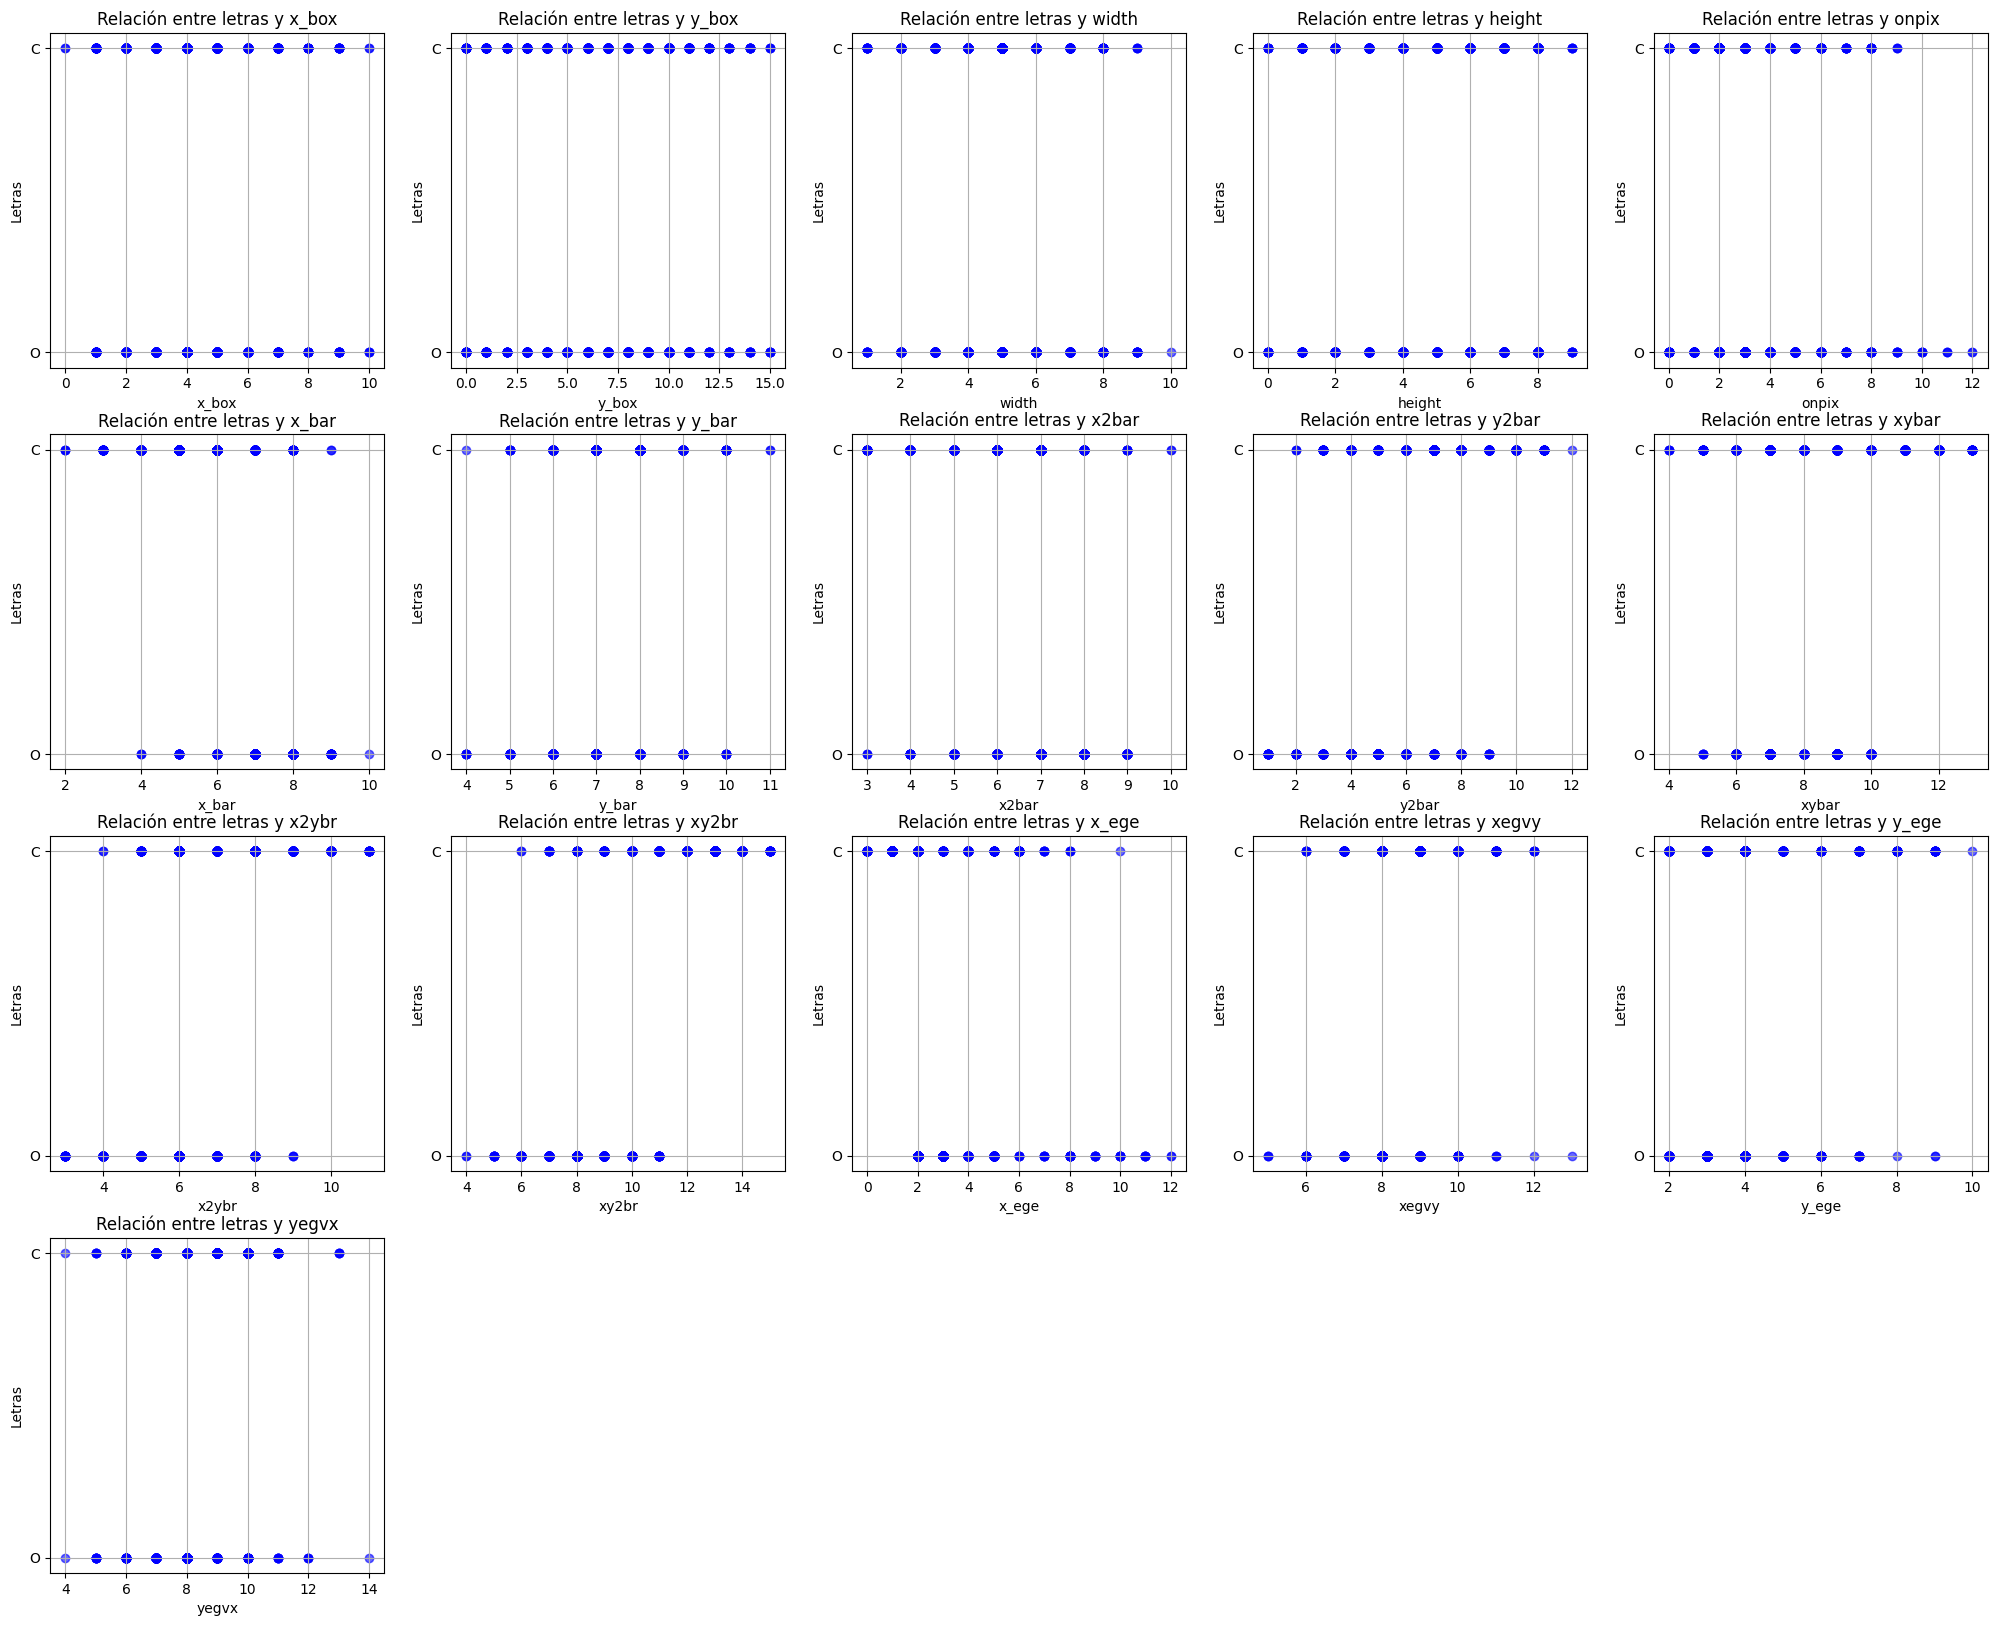

In [36]:
column_names = [col for col in df_oc.columns if col != "letter"]  #Columnas distintas a "letter"
plt.figure(figsize=(25, 20))

#Variables
y = df_oc['letter']

#Gráficas
for i in column_names:
  plt.subplot(4, 5, column_names.index(i)+1)
  plt.scatter(df_oc[i],  y, color='blue', alpha=0.6)
  plt.title(f"Relación entre letras y {i}")
  plt.ylabel("Letras")
  plt.xlabel(i)
  plt.grid(True)
plt.show()

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

#Elección de variables
Para elegir/descartar variables es conveniente hacer un analisis paso a paso:

-no es conveniente utilizar variables donde la distrubición con respecto a cada letras es muy similar, ya que necesitamos encontrar características que se den con mas frecuencia o únicamente para alguna de las 2 (O y C). Entonces se descarta y-Box y height

-también queremos evitar la multicolinealidad. Para eso analizamos la matriz de correlación.

           x_box     y_box     width    height     onpix     x_bar     y_bar  \
x_box   1.000000  0.837062  0.807606  0.771912  0.619327 -0.032841 -0.002238   
y_box   0.837062  1.000000  0.713968  0.869980  0.619825 -0.045713  0.030264   
width   0.807606  0.713968  1.000000  0.826955  0.792102  0.004182 -0.122773   
height  0.771912  0.869980  0.826955  1.000000  0.678605 -0.052674 -0.059284   
onpix   0.619327  0.619825  0.792102  0.678605  1.000000  0.171266 -0.185700   
x_bar  -0.032841 -0.045713  0.004182 -0.052674  0.171266  1.000000 -0.420323   
y_bar  -0.002238  0.030264 -0.122773 -0.059284 -0.185700 -0.420323  1.000000   
x2bar  -0.039835  0.056950  0.057827  0.195706 -0.100167  0.398659 -0.027139   
y2bar  -0.053740 -0.080991 -0.019271  0.076505 -0.449761 -0.475381  0.224085   
xybar   0.228447  0.183892 -0.001512  0.042429 -0.075603 -0.383125  0.279448   
x2ybr   0.016947  0.051080 -0.048928 -0.008654 -0.129322 -0.652298  0.673637   
xy2br  -0.155418 -0.119839 -0.115153 -0.

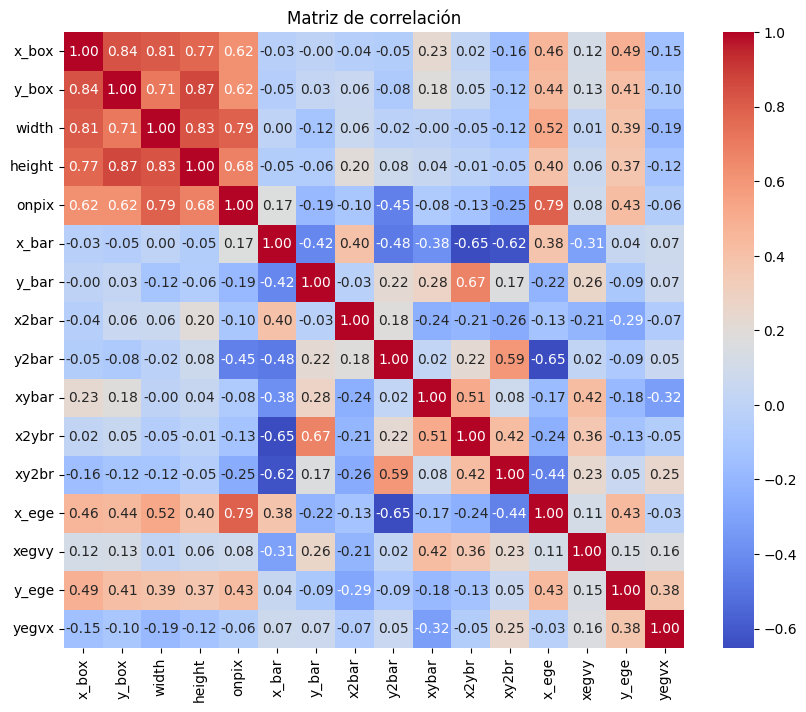

In [37]:
matriz_corr = df_oc.corr(numeric_only=True)
print(matriz_corr)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()



#Fuente:  se combinó la implementación de un heatmap con el prompt: "código para generar una matriz de correlación"

En base a la gráfica, y analizando los indices de correlación, se decidió conservar: y_bar,x2bar,y2bar,xybar,yegvx,width, xegvy

Es importante aclarar de que  es complejo quedarse con variables que tengan indices de correlación muy bajos con el resto de variables. Por eso, como criterio, el valor absoluto del índice de correlación no debe superar el 0.40 (y este caso extremo, debe darse  con muy poca frecuencia)

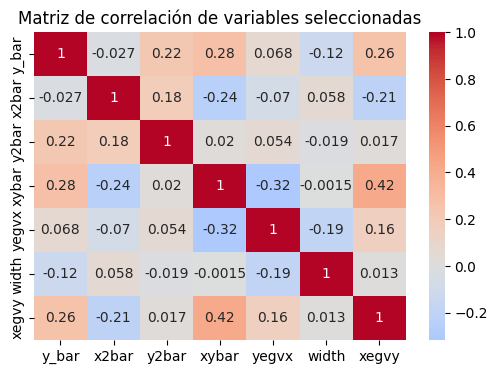

In [38]:
#Columnas de las variables seleccionadas
cols = ["y_bar","x2bar","y2bar",'xybar', 'yegvx', 'width', 'xegvy']
subset = df_oc[cols]

#Matriz de correlación
corr = subset.corr()

#Gráfica
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de variables seleccionadas')
plt.show()

In [39]:
#Nuevo dataset con las variables elegidas
cols = ["letter","y_bar","x2bar","y2bar",'xybar', 'yegvx', 'width', 'xegvy']
df_oc_features = df_oc[cols].copy()
df_oc_features.head()

,letter,y_bar,x2bar,y2bar,xybar,yegvx,width,xegvy
11,O,7,6,3,10,8,4,9
16,O,7,7,5,7,8,4,8
17,C,8,6,8,11,9,5,8
23,O,6,9,6,7,5,7,8
25,C,8,7,11,4,8,7,7


#Valores Nulos
Vimos que no hay valores nulos en el dataset

#Outliers
Calculamos los outliers y los imprimimos

In [40]:
for col in df_oc_features.select_dtypes(include='number').columns:
    Q1 = df_oc_features[col].quantile(0.25)
    Q3 = df_oc_features[col].quantile(0.75)
    IQR = Q3 - Q1

    #Condición
    filtro_outliers = (df_oc_features[col] < Q1 - 1.5 * IQR) | (df_oc_features[col] > Q3 + 1.5 * IQR)

    #Cantidad de outliers
    cantidad = filtro_outliers.sum()

    print(f"{col}: {cantidad} outliers")

#Fuente: se adaptó la implementación de los TPs anteriores


y_bar: 81 outliers
x2bar: 0 outliers
y2bar: 0 outliers
xybar: 23 outliers
yegvx: 122 outliers
width: 1 outliers
xegvy: 66 outliers


#Visualización de outliers
En este caso todas las variables pueden ser graficadas en la misma visualización porque tienen la misma escala (0-15)

In [41]:
# Ejemplo: tus columnas numéricas
num_cols = [col for col in df_oc_features.columns if col != "letter"]

fig = px.box(
    df_oc_features[num_cols].melt(var_name='Variable', value_name='Valor'),
    x='Variable',
    y='Valor',
    title="Boxplots Interactivos de todas las variables",
    points='outliers',

)
fig.update_layout(width=1000, height=600)
fig.show()

#Fuente: prompt "código para graficar visualización de bigotes"

Si analizamos las graficas que relacionan cada feature con cada letra podemos ver que hay variables donde todos los valores posibles se relacionan con la C y la O. Por ejemplo en la gráfica que relaciona letras con y-box. Adsemás no podemos ver cuantas veces cada valor se relaciona con cada letra, por lo que los outliers pueden aportar información útil. Sin embargo, modelos como el de regresión logística se lleva muy mal con los outliers, entonces una buena alternativa es usar winsorización que limita los valores extremos de una variable numérica al rango permitido por cierto percentil.

In [42]:

# Definición de percentiles de recorte (por ejemplo, 8% y 92%). Estos valores se fueron ajustando hasta hacer desaparecer los puntos de los outliers
p_inf = 0.08
p_sup = 0.92


# Hacer winsorización para todas las columnas numéricas
for col in df_oc_features.select_dtypes(include='number').columns:
    lower = df_oc_features[col].quantile(p_inf)
    upper = df_oc_features[col].quantile(p_sup)
    df_oc_features[col] = np.clip(df_oc_features[col], lower, upper)

#Gráfica
fig = px.box(
    df_oc_features[num_cols].melt(var_name='Variable', value_name='Valor'),
    x='Variable',
    y='Valor',
    title="Boxplots Interactivos de todas las variables",
    points='outliers',

)
fig.update_layout(width=1000, height=600)
fig.show()

#Fuente: prompt "código para aplicar el método winsor" y se adaptó el código para la visualización

#Variables categóricas
No se usarán variables categóricas porque todos los features son numéricos

#Escalado
Si bien se recomienda hacer el escalado depues de la división del dataset, es importante aclarar de que el dataset ya esta escalado, ya que todos los features se mantienen en un rango de 0 a 15

In [43]:
# Separar features (X) y target (y)
X = df_oc_features.drop(columns=['letter'])
y = df_oc_features['letter']

# Dividir en entrenamiento (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para test
    random_state=42,    # para reproducibilidad
    stratify=y          # mantiene el balance entre clases O y C
)





## 4. **Clasificación con logistic regression**  
   

In [44]:
# Crear el clasificador
clf = LogisticRegression()

# Entrenar el modelo
clf.fit(X_train, y_train)



LogisticRegression()

### Métricas de evaluación

In [45]:

# 📘 Evaluación en TRAINING

y_train_pred = clf.predict(X_train)

conf_train = confusion_matrix(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred, pos_label='O')
rec_train = recall_score(y_train, y_train_pred, pos_label='O')
f1_train = f1_score(y_train, y_train_pred, pos_label='O')

print("=== Métricas en ENTRENAMIENTO ===")
print(conf_train)
print(f"Exactitud (Accuracy): {acc_train:.3f}")
print(f"Precisión: {prec_train:.3f}")
print(f"Recall: {rec_train:.3f}")
print(f"F1 Score: {f1_train:.3f}\n")


# 📗 Evaluación en TEST

y_test_pred = clf.predict(X_test)

conf_test = confusion_matrix(y_test, y_test_pred)
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred, pos_label='O')
rec_test = recall_score(y_test, y_test_pred, pos_label='O')
f1_test = f1_score(y_test, y_test_pred, pos_label='O')

print("=== Métricas en TEST ===")
print(conf_test)
print(f"Exactitud (Accuracy): {acc_test:.3f}")
print(f"Precisión: {prec_test:.3f}")
print(f"Recall: {rec_test:.3f}")
print(f"F1 Score: {f1_test:.3f}")

#Fuente: se usó el prompt "código para imprimir la matriz de confusión y métricas"

=== Métricas en ENTRENAMIENTO ===
[[549  40]
 [ 30 572]]
Exactitud (Accuracy): 0.941
Precisión: 0.935
Recall: 0.950
F1 Score: 0.942

=== Métricas en TEST ===
[[134  13]
 [  6 145]]
Exactitud (Accuracy): 0.936
Precisión: 0.918
Recall: 0.960
F1 Score: 0.939


# Interpretación: Regresión logística
#Entrenamiento
- **Matriz de Confusión**:
  - 549 Verdaderos Negativos (clase C correctamente predicha).
  - 472 Verdaderos Positivos (clase O correctamente predicha).
  - 40 Falsos Positivos (predijo clase O, pero era clase C).
  - 30 Falsos Negativos (predijo clase C, pero era clase O).
  
- **Exactitud (Accuracy)**: El modelo acertó en el 94.1% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 93.5% fueron correctas.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 95% de los casos positivos.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando  0.942.

#Test
- **Matriz de Confusión**:
  - 134 Verdaderos Negativos (clase C correctamente predicha).
  - 145 Verdaderos Positivos (clase O correctamente predicha).
  - 13 Falsos Positivos (predijo clase O, pero era clase C).
  - 6 Falsos Negativos (predijo clase C, pero era clase O).
  
- **Exactitud (Accuracy)**: El modelo acertó en el 93.62% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 91.77% fueron correctas.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 96.02% de los casos positivos.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando  0.9385.

================================================================================
Si analizamos la relación entre ambos conjuntos de métricas podemos decir:

Diferencias:

-Exactitud |0.941 - 0.936| = 0.005

-Precisión |0.935 - 0.918| = 0.017

-Recall |0.950 - 0.960| = 0.01

-F1 |0.942 - 0.939| = 0.003

Todas las diferencias son muy pequeñas por lo que el modelo generaliza bien.Además:

*   el Accuarcy es grande en ambos casos, no hay underfitting.
*   el Accuarcy del entrenamiento es ligeramente menor, no hay overfitting

Con el F1 sucede lo mismo, por lo cual no hay underfitting ni overfitting

El resultado es bastante satisfactorio.


## 5- **Otro clasificador**

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

#Modelo SVM
La elección de este modelo depende de los siguientes aspectos:


*   MLP es un modelo que necesita una cantidad significativa de datos y al acotar el dataset a 2 clases, la cantidad de datos se redujo muchísimo para la cantidad de features si usara este modelo
*   SVM es una muy buena opción si se tienen datos numéricos (todas mis features son de tipo numérico) y requiere menos datos

*   SVM ofrece flexibilidad desde el kernel para tratar problemas lineales y no lineales, y por lo tanto, una mejor hiperparametrización






### 5.2 Entrenamiento del modelo.

In [46]:
# Crear el modelo SVM con los hiperparámetros por default
svm_model = SVC()

# Entrenamiento
svm_model.fit(X_train, y_train)
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

### 5.3 Evaluación del desempeño

In [47]:
# Métricas de entrenamiento
print("Entrenamiento:")
print(confusion_matrix(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, pos_label='O'))
print("Recall:", recall_score(y_train, y_pred_train, pos_label='O'))
print("F1:", f1_score(y_train, y_pred_train, pos_label='O'))

# Métricas de test
print("\nTest:")
print(confusion_matrix(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, pos_label='O'))
print("Recall:", recall_score(y_test, y_pred_test, pos_label='O'))
print("F1:", f1_score(y_test, y_pred_test, pos_label='O'))


#Fuente: se adaptó el código propuesto por ChatGpt en la primera impresión de métricas

Entrenamiento:
[[559  30]
 [  5 597]]
Accuracy: 0.9706129303106633
Precision: 0.9521531100478469
Recall: 0.9916943521594684
F1: 0.9715215622457283

Test:
[[135  12]
 [  2 149]]
Accuracy: 0.9530201342281879
Precision: 0.9254658385093167
Recall: 0.9867549668874173
F1: 0.9551282051282052


# Interpretación: SVM
#Entrenamiento
- **Matriz de Confusión**:
  - 559 Verdaderos Negativos (clase C correctamente predicha).
  - 597 Verdaderos Positivos (clase O correctamente predicha).
  - 30 Falsos Positivos (predijo clase O, pero era clase C).
  - 5 Falsos Negativos (predijo clase C, pero era clase O).
  
- **Exactitud (Accuracy)**: El modelo acertó en el 97.06% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 95.21% fueron correctas.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 99.16% de los casos positivos.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando  0.9715.

#Test
- **Matriz de Confusión**:
  - 135 Verdaderos Negativos (clase C correctamente predicha).
  - 149 Verdaderos Positivos (clase O correctamente predicha).
  - 12 Falsos Positivos (predijo clase O, pero era clase C).
  - 2 Falsos Negativos (predijo clase C, pero era clase O).
  
- **Exactitud (Accuracy)**: El modelo acertó en el 95.3% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 92.54% fueron correctas.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 98.67% de los casos positivos.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando  0.9551.

================================================================================
Si analizamos la relación entre ambos conjuntos de métricas podemos decir:

Diferencias:

Exactitud: |0.9706 − 0.9530| = 0.0176

Precisión: |0.9521 − 0.9254| = 0.0267

Recall: |0.9916 − 0.9867| = 0.0049

F1: |0.9715 − 0.9551| = 0.0164

Todas las diferencias son muy pequeñas por lo que el modelo generaliza bien.Además:

*   el Accuarcy es más grande en ambos casos, no hay underfitting.
*   para las métricas de exactitud, F1 y precisión, las diferencias entre el conjunto de entrenamiento y testeo es ligeramente major, por lo cual no generaliza tan bien como el modelo de regresión logística





## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

In [48]:

#Modelo
svm_model_tunned = SVC(
    C=2.0,          #Regularización
    kernel='poly',  #Tipo de Kernel
    degree = 5,     #Grado función polinómica
    gamma='auto',   #Coeficiente kernel
    coef0 = 2.0     #Término independiente de la función kernel
)

#Entrenamiento
svm_model_tunned.fit(X_train, y_train)
y_pred_train = svm_model_tunned.predict(X_train)
y_pred_test = svm_model_tunned.predict(X_test)


#Fuente: para conocer los hiperparámetros se recurrió a la documentación: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [49]:
# Métricas de entrenamiento
print("Entrenamiento:")
print(confusion_matrix(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, pos_label='O'))
print("Recall:", recall_score(y_train, y_pred_train, pos_label='O'))
print("F1:", f1_score(y_train, y_pred_train, pos_label='O'))

# Métricas de test
print("\nTest:")
print(confusion_matrix(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, pos_label='O'))
print("Recall:", recall_score(y_test, y_pred_test, pos_label='O'))
print("F1:", f1_score(y_test, y_pred_test, pos_label='O'))

Entrenamiento:
[[588   1]
 [  0 602]]
Accuracy: 0.9991603694374476
Precision: 0.9983416252072969
Recall: 1.0
F1: 0.9991701244813278

Test:
[[140   7]
 [  9 142]]
Accuracy: 0.9463087248322147
Precision: 0.9530201342281879
Recall: 0.9403973509933775
F1: 0.9466666666666667


# Interpretación: SVM tuneado
#Entrenamiento
- **Matriz de Confusión**:
  - 588 Verdaderos Negativos (clase C correctamente predicha).
  - 602 Verdaderos Positivos (clase O correctamente predicha).
  - 1 Falsos Positivos (predijo clase O, pero era clase C).
  - 0 Falsos Negativos (predijo clase C, pero era clase O).
  
- **Exactitud (Accuracy)**: El modelo acertó en el 99.91% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 99.83% fueron correctas.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 100% de los casos positivos.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando  0.9991.

#Test
- **Matriz de Confusión**:
  - 140 Verdaderos Negativos (clase C correctamente predicha).
  - 142 Verdaderos Positivos (clase O correctamente predicha).
  - 7 Falsos Positivos (predijo clase O, pero era clase C).
  - 9 Falsos Negativos (predijo clase C, pero era clase O).
  
- **Exactitud (Accuracy)**: El modelo acertó en el 94.63% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 95.30% fueron correctas.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 94.03% de los casos positivos.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando  0.9466.


Se puede observar que los valores de las métricas para el conjunto de entrenamiento, son mayores. Mientras que los de testeo, son menores. Por lo tanto la diferencias son mas grándes y, consecuentemente, generalizan peor.

Además, esto es señal de un posible overfitting

## 6- Conclusiones

Fundamente, justifique con sus palabras.

Tras la seleccion de 2 letras para el problema binario y un dataset relativamente balanceado se pudo obtener muy buenos resultados con el modelo de regresión logística. Una parte fundamental fue la cuidadosa selección de features luego del análisis de las correlaciones.

Si lo comparamos con  la primera configuracion del SVM, podemos ver métricas mas bajas, pero con una mejor generalización en el modelo de Regresión Logística, y esto es fundamental para decidir. Esto se debe a que la idea de un modelo es poder rendir bien para datos nuevos, no sobre los que ya vió.

Respecto al SVM tuneado, podríamos ver inicialmente una mejora en las métricas de entrenamiento, pero también una tendencia al sobreajuste, ya que las métricas del testeo bajan. Esta situación tampoco es óptima para la idea de rendeir bien para nuevos datos (del mundo real)

Por eso, el mejor modelo de los 3 es el de regresión logística.

# BONUS 1

Si su dataset estaba relativamente balanceado, como bonus pruebe entrenar otro modelo clasificador diferente y comparar resultados con su clasificador elegido en 5) y el modelo elegido 6) luego del tuneo de hiperparámetros.



In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Métricas de entrenamiento
print("=== Entrenamiento ===")
print("Matriz de confusión:")
print(confusion_matrix(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, pos_label='O'))
print("Recall:", recall_score(y_train, y_pred_train, pos_label='O'))
print("F1:", f1_score(y_train, y_pred_train, pos_label='O'))

# Métricas de test
print("\n=== Test ===")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, pos_label='O'))
print("Recall:", recall_score(y_test, y_pred_test, pos_label='O'))
print("F1:", f1_score(y_test, y_pred_test, pos_label='O'))


#Fuente: la estructura en los modelos de sklearn es muy parecida a la hora de entrenar modelos, asi que busque en internet "clasificador de knn" y adapté el código según los modelos anteriores


=== Entrenamiento ===
Matriz de confusión:
[[578  11]
 [  8 594]]
Accuracy: 0.984047019311503
Precision: 0.9818181818181818
Recall: 0.9867109634551495
F1: 0.9842584921292461

=== Test ===
Matriz de confusión:
[[141   6]
 [  3 148]]
Accuracy: 0.9697986577181208
Precision: 0.961038961038961
Recall: 0.9801324503311258
F1: 0.9704918032786886


Si comparamos este último modelo con los anteriores:

vemos métricas muy altas, pero que a su vez conservan una buena generalizacion.

*   Vemos métricas muy altas para ambos conjuntos (no hay underfitting)
*   Poca diferencia entre las métricas, lo cual implica una muy buena generalización

*   Como la diferencia es poca, no hay señales claras de overfitting

Esto permite concluir que es la mejor opción hasta el momento.

# BONUS 2

Si su dataset estaba desbalanceado, puebe utilizar alguna técnica para lidiar con el desbalance de clases durante el entrenamiento.

1) Ofrezca una comparativa de entrenar y evaluar modelos de Logistic regression con y sin class_weight='balanced' o el modelo SVC con y sin class_weight='balanced'

2) Pruebe entrenar KNN con y sin uso de SMOTE

( Ver apunte sobre Desbalance de clases de la cátedra )

